In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [3]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
# Converting to datetime 

df['FullDate'] = pd.to_datetime(df.FullDate)

In [5]:
# Setting date as index

df.set_index("FullDate" , inplace= True)

In [6]:
df.isna().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [7]:
# Using daily sampling on the data

df = df.resample('D').sum()
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [8]:
# Restoring the full date column

df['FullDate'] = df.index

In [9]:
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice,FullDate
FullDate,,,,,
2010-09-01,379.2,41565.380,88.56,2751.700,2010-09-01
2010-09-02,369.6,38898.990,88.56,570.810,2010-09-02
2010-09-03,439.2,41665.760,106.80,504.975,2010-09-03
2010-09-04,328.8,35638.085,81.36,502.275,2010-09-04
2010-09-05,357.6,35611.410,106.80,500.555,2010-09-05


Text(0, 0.5, 'ElecPrice')

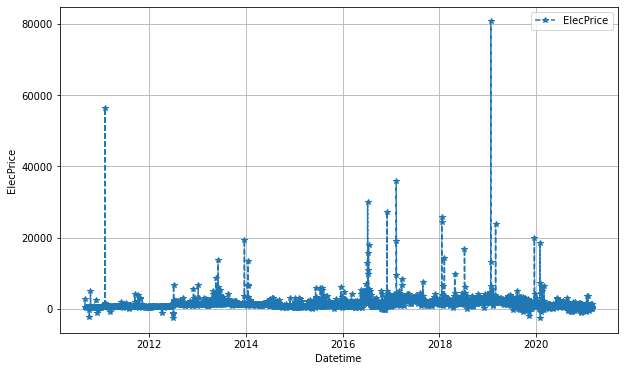

In [10]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df.index, df.ElecPrice, '--' , marker= '*', label= 'ElecPrice')
plt.grid()
plt.legend()
plt.xlabel('Datetime')
plt.ylabel('ElecPrice')

In [11]:
# P-value of the SysLoad

from statsmodels.tsa.stattools import adfuller
adf_result_sys = adfuller(df[ 'SysLoad' ])
print(f'p-value: {adf_result_sys[ 1 ]}')

p-value: 0.004253725504574117


In [12]:
# P-value of the GasPrice

adf_result_gas = adfuller(df[ 'GasPrice' ])
print(f'p-value: {adf_result_gas[ 1 ]}')

p-value: 0.04502721288462542


In [13]:
# Critical values of GasPrice and ElecPrice

adf_result_elec = adfuller(df[ 'ElecPrice' ])
for k, v in adf_result_elec[ 4 ].items():
 print(f'{k} : {v}')

1% : -3.432066157296446
5% : -2.8622983040036005
10% : -2.5671736550459663


## Univariate Model

In [14]:
df1 = df.copy()

In [15]:
df1.drop(columns= ['Tmax', 'SysLoad', 'GasPrice'], inplace= True)

In [16]:
df1.rename(columns= {'FullDate':'ds', 'ElecPrice':'y'}, inplace= True)

In [17]:
df1.head()

,y,ds
FullDate,,
2010-09-01,2751.700,2010-09-01
2010-09-02,570.810,2010-09-02
2010-09-03,504.975,2010-09-03
2010-09-04,502.275,2010-09-04
2010-09-05,500.555,2010-09-05


In [18]:
df1_train = df1[:2757]
df1_test = df1[2757:]

In [19]:
from prophet import Prophet
model = Prophet()
model.fit(df1_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f6eh9sk/1a213i0k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f6eh9sk/2r5dnkis.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69761', 'data', 'file=/tmp/tmp1f6eh9sk/1a213i0k.json', 'init=/tmp/tmp1f6eh9sk/2r5dnkis.json', 'output', 'file=/tmp/tmp1f6eh9sk/prophet_modelska05etb/prophet_model-20230131200104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:01:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:01:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [20]:
forecast = model.predict(df1_test)
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,2529.525196,226.292001,4830.823330,2684.565824,2684.565824,2684.565824
1,2018-03-21,2682.792291,266.435152,5070.169637,2685.359782,2685.359782,2685.359782
2,2018-03-22,2781.761050,425.026196,5035.186653,2686.153740,2686.153740,2686.153740
3,2018-03-23,2573.869878,19.893770,4853.160548,2686.947698,2686.947698,2686.947698
4,2018-03-24,2249.067995,-136.174944,4609.262617,2687.741656,2687.741656,2687.741656
...,...,...,...,...,...,...,...
1072,2021-02-24,3446.060747,679.766399,6463.381493,3535.688715,1871.262725,5132.494060
1073,2021-02-25,3512.928139,464.000785,6403.441805,3536.482672,1870.045902,5134.769160
1074,2021-02-26,3279.749616,316.456265,6261.429780,3537.276630,1868.829080,5137.044260
1075,2021-02-27,2936.426367,-49.906171,5800.989154,3538.070588,1867.612257,5139.319360


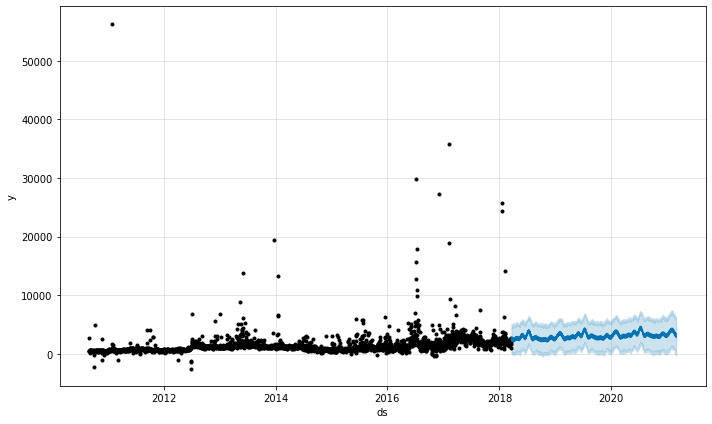

In [21]:
model.plot(forecast)
plt.show()

## Multivariate Model

In [22]:
df2 = df.copy()
df2.rename(columns= {
    'FullDate':'ds', 
    'ElecPrice':'y',
    'SysLoad':'add1',
    'Tmax':'add2',
    'GasPrice':'add3',
    }, inplace= True)

In [23]:
df2_train = df2[:2757]
df2_test = df2[2757:]

In [24]:
model2 = Prophet()
model2.fit(df2_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f6eh9sk/8ib4nf1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1f6eh9sk/6v8hmejc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18164', 'data', 'file=/tmp/tmp1f6eh9sk/8ib4nf1n.json', 'init=/tmp/tmp1f6eh9sk/6v8hmejc.json', 'output', 'file=/tmp/tmp1f6eh9sk/prophet_model15l3e0bf/prophet_model-20230131200109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:01:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:01:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
df2_test.tail()

,add2,add1,add3,y,ds
FullDate,,,,,
2021-02-24,537.6,-1525.49745,134.4000,634.770,2021-02-24
2021-02-25,518.4,4539.07855,130.5048,577.515,2021-02-25
2021-02-26,547.2,9517.02430,130.1808,1445.495,2021-02-26
2021-02-27,564.0,4932.88015,130.0800,488.980,2021-02-27
2021-02-28,583.2,6675.05485,131.6352,-98.985,2021-02-28


In [26]:
forecast2 = model2.predict(df2_test)
forecast2[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,2529.525196,59.856041,4878.149493,2684.565824,2684.565824,2684.565824
1,2018-03-21,2682.792291,113.891313,5252.408032,2685.359782,2685.359782,2685.359782
2,2018-03-22,2781.761050,241.242168,4971.077099,2686.153740,2686.153740,2686.153740
3,2018-03-23,2573.869878,271.405337,5043.564048,2686.947698,2686.947698,2686.947698
4,2018-03-24,2249.067995,-338.597621,4826.261274,2687.741656,2687.741656,2687.741656
...,...,...,...,...,...,...,...
1072,2021-02-24,3446.060747,293.122748,6393.154109,3535.688715,1622.727096,5184.456772
1073,2021-02-25,3512.928139,390.133162,6621.142039,3536.482672,1621.879808,5187.474456
1074,2021-02-26,3279.749616,4.656918,6349.997661,3537.276630,1621.032521,5190.492140
1075,2021-02-27,2936.426367,-224.046520,5796.162424,3538.070588,1620.185233,5193.714407


In [27]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(df2_test['y'], forecast2['yhat'])
mape

5.447254323999416

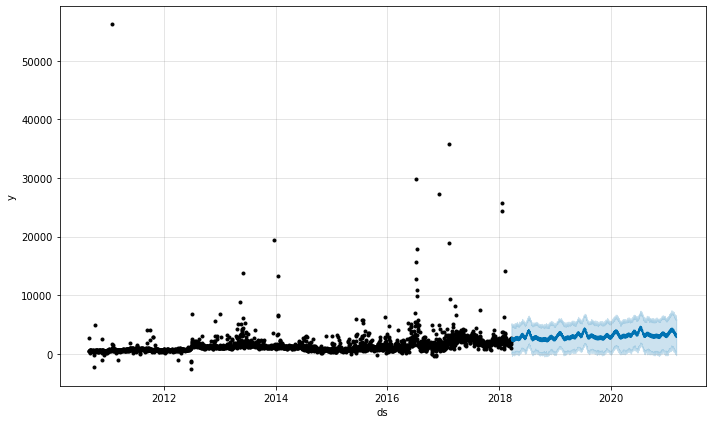

In [28]:
model2.plot(forecast2)
plt.show()